# Introducción

En este laboratorio se realizará una exploración sobre el dataset [We are from our childhood](https://www.kaggle.com/jkokatjuhha/we-are-from-our-childhood/notebook). El objetivo de este 
dataset es evaluar diferencias y similitudes entre personas que se han criado en zonas rurales o en la ciudad.
La muestra se tomo entre personas habitantes de Eslovaquia de ambo sexos, de entre 15 y 30 años de edad.

Consideraciones del dataset:
* El dataset esta formado por 1010 filas y 150 colunas (139 números enteros y 11 categoricas).
* Los datos contienen valores NaN.
* Por conveniencia los nombres de las columnas han sido acortados, los nombres completos se encuentran en *columns.csv*.


Puede encontrar mayor información sobre este dataset [aquí](https://www.kaggle.com/jkokatjuhha/we-are-from-our-childhood/data).

## Desarrollo
### Estadísticas descriptivas

* Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. ¿Responden a alguna distribución conocida?
* Realizar un análisis de outliers.
* Explicar cómo varían las métricas cuando desglosamos por género. ¿Responden a alguna distribución conocida? Comparar cualitativamente y gráficamente ambas distribuciones. Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.


In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("whitegrid")

pd.set_option('display.max_columns',150) # Para poder visualizar todas las columnas

dataset = pd.read_csv("./datasets/responses.csv", sep=",")

# Visualizamos la tabla
dataset[:5]



,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

## 1 - Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. ¿Responden a alguna distribución conocida?

In [2]:
#Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. 
#¿Responden a alguna distribución conocida?

dataset_peso = dataset.dropna(subset=["Weight"])
dataset_edad = dataset.dropna(subset=["Age"])

peso_media = dataset_peso["Weight"].mean()
peso_mediana = dataset_peso["Weight"].median()
peso_moda = dataset_peso["Weight"].mode()
peso_std = dataset_peso["Weight"].std()

edad_media = dataset_edad["Age"].mean()
edad_mediana = dataset_edad["Age"].median()
edad_moda = dataset_edad["Age"].mode()
edad_std = dataset_edad["Age"].std()


print("""
   Peso Media: %.2f
   Peso Mediana: %.2f
   Peso Moda: %.2f
   Peso Desv. Std: %.2f\n
   Edad Media: %.2f
   Edad Mediana: %d
   Edad Moda: %d
   Edad Desv. Std: %.2f
""" % (peso_media,peso_mediana,peso_moda, peso_std, edad_media,edad_mediana,edad_moda, edad_std))


   Peso Media: 66.41
   Peso Mediana: 64.00
   Peso Moda: 60.00
   Peso Desv. Std: 13.84

   Edad Media: 20.43
   Edad Mediana: 20
   Edad Moda: 19
   Edad Desv. Std: 2.83



C:\Users\maliaga\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


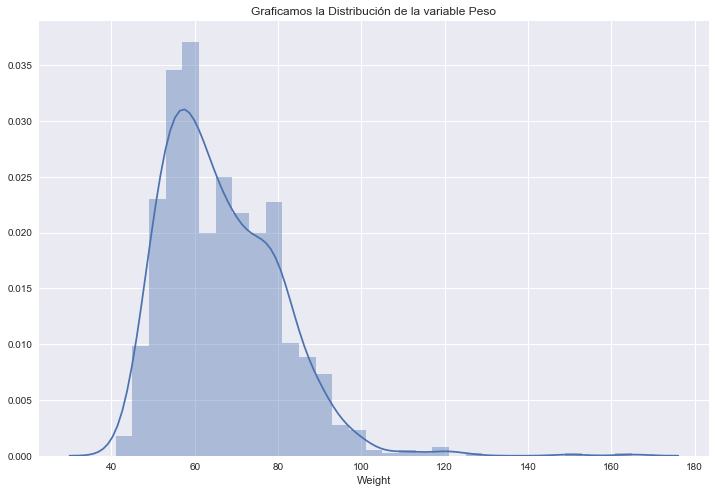

In [3]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = plt.axes()
ax.set_title('Graficamos la Distribución de la variable Peso')
sns.distplot(dataset_peso.Weight);

C:\Users\maliaga\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


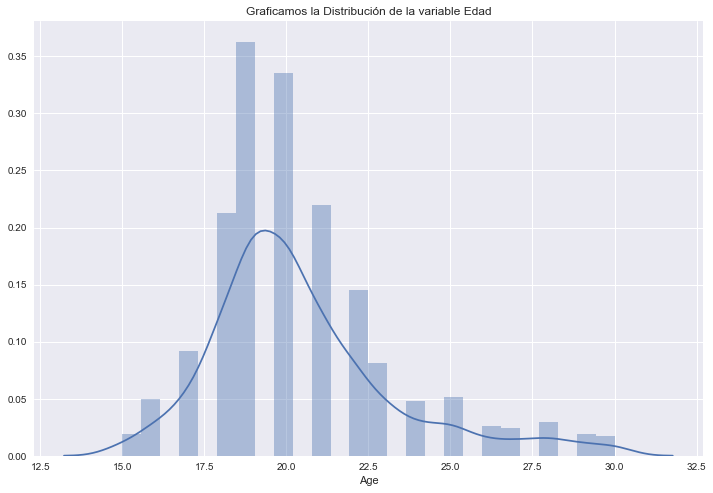

In [4]:
ax = plt.axes()
ax.set_title('Graficamos la Distribución de la variable Edad')
sns.distplot(dataset_edad.Age);

**Los valores de media, mediana y moda estan muy próximos entre si lo cual nos hace suponer que responden a una distribución normal. La diferencia númerica que existe entre estos 3 estadisticos puede ser atribuible al tamaño de la muestra (1010 individuos).**

## 2 - Realizar un análisis de outliers.

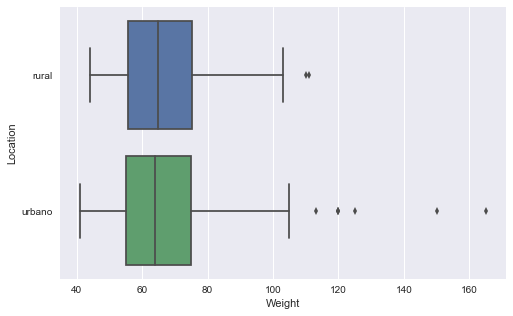

In [5]:
dataset_peso_rural = dataset_peso.loc[dataset_peso["Village - town"]=="village"].assign(Location="rural")
dataset_peso_urbano = dataset_peso.loc[dataset_peso["Village - town"]=="city"].assign(Location="urbano")

dataset_peso_rural_urbano = pd.concat([dataset_peso_rural, dataset_peso_urbano])

sns.set(rc={'figure.figsize':(8, 5)})
sns.boxplot(x="Weight", y="Location", data=dataset_peso_rural_urbano);

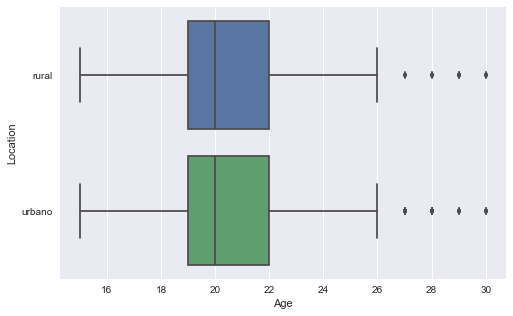

In [6]:
dataset_edad_rural = dataset_edad.loc[dataset_edad["Village - town"]=="village"].assign(Location="rural")
dataset_edad_urbano = dataset_edad.loc[dataset_edad["Village - town"]=="city"].assign(Location="urbano")

dataset_edad_rural_urbano = pd.concat([dataset_edad_rural, dataset_edad_urbano])

sns.set(rc={'figure.figsize':(8, 5)})
sns.boxplot(x="Age", y="Location", data=dataset_edad_rural_urbano);

**Se analizaron los datos sobre las v.a edad y peso discriminadas por lugar de crianza, de los graficos de caja anteriores vemos que no existen valores por debajo de los limites dados por 1.5 veces el rango intercuartil pero si por encima. Tambien vemos que podemos establecer un umbral común tanto en peso como en edad para ambos análisis por lugar de crianza. 
Dado esto procederemos a calcular el valor del umbral para filtrar los outliers.**


In [7]:
#Calculamos cuartiles 1 y 3
q1_peso = dataset_peso.Weight.quantile(0.25)
q1_edad = dataset_edad.Age.quantile(0.25)

q3_peso = dataset_peso.Weight.quantile(0.75)
q3_edad = dataset_edad.Age.quantile(0.75)

# Calculamos el rango intercuartil
rango_peso = q3_peso - q1_peso
rango_edad = q3_edad - q1_edad

#Calculamos largo de bigotes
umbral_peso = int(q3_peso + (1.5 * rango_peso))
umbral_edad = int(q3_edad + (1.5 * rango_edad))

print("Umbral para la v.a peso: {}".format(umbral_peso))
print("Umbral para la v.a edad: {}".format(umbral_edad))

Umbral para la v.a peso: 105
Umbral para la v.a edad: 26


In [8]:
#Filtramos los outliers
dataset_peso_filtrado = dataset_peso[dataset_peso.Weight<umbral_peso]
dataset_edad_filtrado = dataset_edad[dataset_edad.Age<umbral_edad]

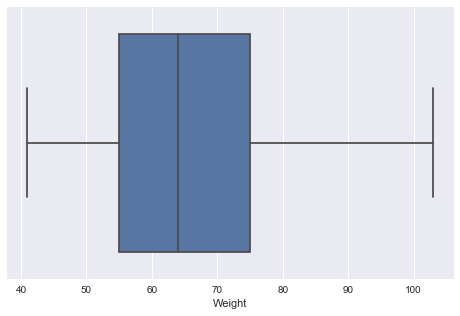

In [9]:
# graficamos  nuevamente los graficos de caja
sns.set(rc={'figure.figsize':(8, 5)})
sns.boxplot(x="Weight", data=dataset_peso_filtrado);

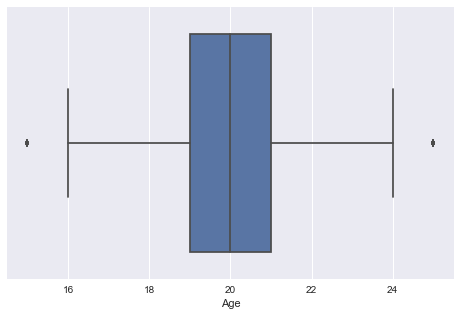

In [10]:
sns.boxplot(x="Age", data=dataset_edad_filtrado);

**En el caso de la edad al realizar el primer filtrado vemos que surgen nuevos datos atipicos. Estos valores se encuentran dispuestos de manera simetrica con respecto a la distribución. Calcularemos los estadisticos de la muestra antes y despues de filtrar estos nuevos outliers para evaluar su efecto.**

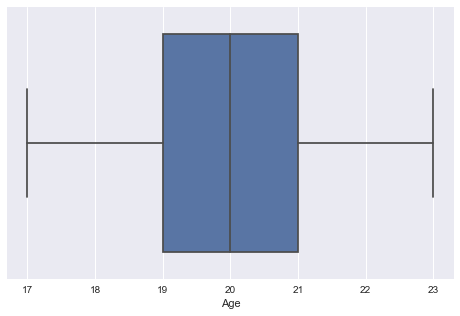

In [11]:
q1_edad = dataset_edad_filtrado.Age.quantile(0.25)
q3_edad = dataset_edad_filtrado.Age.quantile(0.75)

# Calculamos el rango intercuartil
rango_edad = q3_edad - q1_edad

#Calculamos largo de bigotes
umbral_edad_min = int(q1_edad - (1.5 * rango_edad))
umbral_edad_max = int(q3_edad + (1.5 * rango_edad))


dataset_edad_filtrado_2 = dataset_edad_filtrado[dataset_edad_filtrado.Age<umbral_edad_max]
dataset_edad_filtrado_2 = dataset_edad_filtrado_2[dataset_edad_filtrado_2.Age>umbral_edad_min]

sns.boxplot(x="Age", data=dataset_edad_filtrado_2);

In [12]:
# Calculamos los estadisticos antes y despues del segundo filtrado
edad_media_antes = dataset_edad_filtrado["Age"].mean()
edad_mediana_antes = dataset_edad_filtrado["Age"].median()
edad_moda_antes = dataset_edad_filtrado["Age"].mode()
edad_std_antes = dataset_edad_filtrado["Age"].std()

edad_media_dsp = dataset_edad_filtrado_2["Age"].mean()
edad_mediana_dsp = dataset_edad_filtrado_2["Age"].median()
edad_moda_dsp = dataset_edad_filtrado_2["Age"].mode()
edad_std_dsp = dataset_edad_filtrado_2["Age"].std()

print("""Antes de segundo filtrado\n
   Edad Media: %.2f
   Edad Mediana: %d
   Edad Moda: %d
   Edad Desv. Std: %.2f
""" % (edad_media_antes, edad_mediana_antes, edad_moda_antes, edad_std_antes))

print("""Despues de segundo filtrado\n
   Edad Media: %.2f
   Edad Mediana: %d
   Edad Moda: %d
   Edad Desv. Std: %.2f
""" % (edad_media_dsp, edad_mediana_dsp, edad_moda_dsp, edad_std_dsp))



Antes de segundo filtrado

   Edad Media: 19.91
   Edad Mediana: 20
   Edad Moda: 19
   Edad Desv. Std: 2.07

Despues de segundo filtrado

   Edad Media: 19.79
   Edad Mediana: 20
   Edad Moda: 19
   Edad Desv. Std: 1.56



**Observamos que si bien no afectan significativamente a las medidas centrales como la media, mediana y moda, si afecta a la varianza ya que ocasionan una dispersión de datos mayor. 
La mayoria de los outliers se encontraban en el lado derecho de la distribución esto ocasionaba que la media sea mayor, al filtrar los outliers la media disminuyo al igual que la varianza.**

## 3 - Explicar cómo varían las métricas cuando desglosamos por género. ¿Responden a alguna distribución conocida? Comparar cualitativamente y gráficamente ambas distribuciones. Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.

### Análisis v.a. peso hombres vs v.a peso mujeres

In [13]:
dataset_peso_hombres = dataset_peso[dataset_peso.Gender=="male"]
dataset_peso_mujeres = dataset_peso[dataset_peso.Gender=="female"]

peso_media_hombres = dataset_peso_hombres["Weight"].mean()
peso_media_mujeres = dataset_peso_mujeres["Weight"].mean()

peso_mediana_hombres = dataset_peso_hombres["Weight"].median()
peso_mediana_mujeres = dataset_peso_mujeres["Weight"].median()

peso_moda_hombres = dataset_peso_hombres["Weight"].mode()
peso_moda_mujeres = dataset_peso_mujeres["Weight"].mode()

peso_std_hombres = dataset_peso_hombres["Weight"].std()
peso_std_mujeres = dataset_peso_mujeres["Weight"].std()



print("""
  Peso Media Hombres: %.2f vs Peso Media Mujeres: %.2f
  Peso Mediana Hombres: %.2f vs Peso Mediana Mujeres: %.2f
  Peso Moda Hombres: %.2f vs Peso Moda Mujeres: %.2f
  Peso Desv. Std Hombres: %.2f vs Peso Desv. Std Mujeres: %.2f
""" % (peso_media_hombres, peso_media_mujeres, peso_mediana_hombres, peso_mediana_mujeres, peso_moda_hombres, peso_moda_mujeres, peso_std_hombres, peso_std_mujeres))


  Peso Media Hombres: 77.09 vs Peso Media Mujeres: 58.96
  Peso Mediana Hombres: 77.00 vs Peso Mediana Mujeres: 57.00
  Peso Moda Hombres: 80.00 vs Peso Moda Mujeres: 60.00
  Peso Desv. Std Hombres: 11.35 vs Peso Desv. Std Mujeres: 10.01



C:\Users\maliaga\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


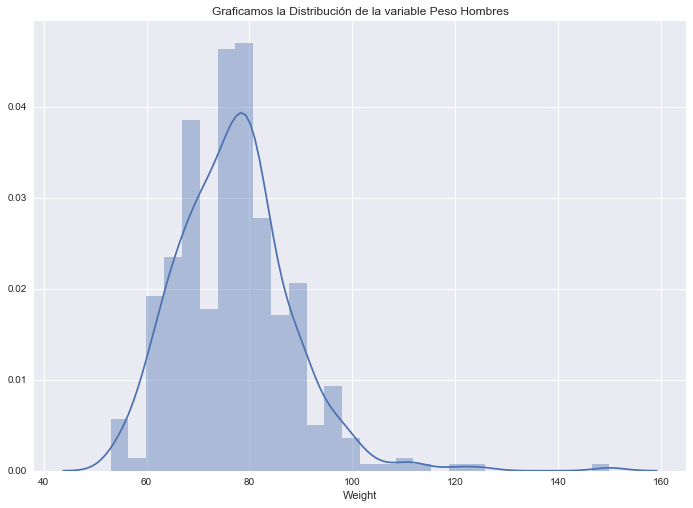

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = plt.axes()
ax.set_title('Graficamos la Distribución de la variable Peso Hombres')
sns.distplot(dataset_peso_hombres.Weight);

C:\Users\maliaga\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


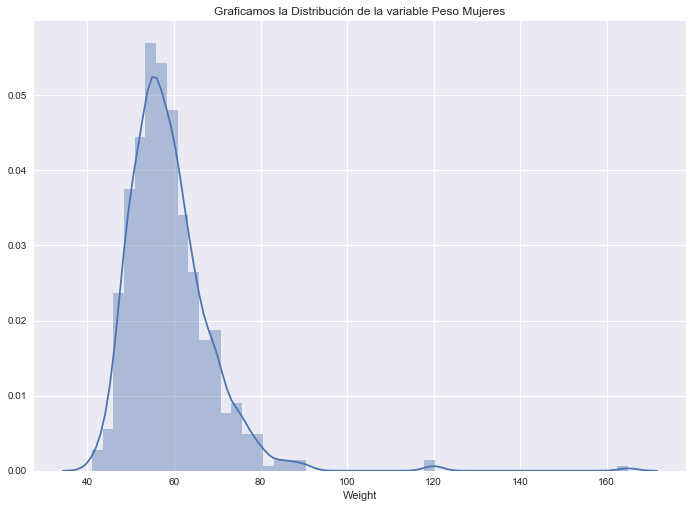

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = plt.axes()
ax.set_title('Graficamos la Distribución de la variable Peso Mujeres')
sns.distplot(dataset_peso_mujeres.Weight);

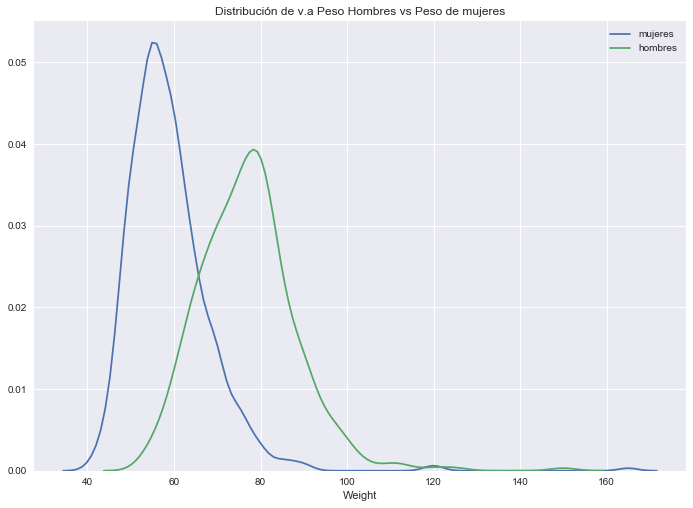

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = plt.axes()
ax.set_title('Distribución de v.a Peso Hombres vs Peso de mujeres')
sns.distplot(dataset_peso_mujeres.Weight, hist=False, label="mujeres");
sns.distplot(dataset_peso_hombres.Weight, hist=False, label="hombres");

**Las distribuciones de ambas v.a responden a una distribuciones normal. Como era de esperarse como los individuos de la muestra se encuentran en un mismo rango de edad el peso medio de los hombres es mayor que el peso medio de las mujeres.**

### Análisis v.a. edad hombres encuestados vs v.a edad mujeres encuestadas

In [17]:
dataset_edad_hombres = dataset_edad[dataset_edad.Gender=="male"]
dataset_edad_mujeres = dataset_edad[dataset_edad.Gender=="female"]

edad_media_hombres = dataset_edad_hombres["Age"].mean()
edad_media_mujeres = dataset_edad_mujeres["Age"].mean()

edad_mediana_hombres = dataset_edad_hombres["Age"].median()
edad_mediana_mujeres = dataset_edad_mujeres["Age"].median()

edad_moda_hombres = dataset_edad_hombres["Age"].mode()
edad_moda_mujeres = dataset_edad_mujeres["Age"].mode()

edad_std_hombres = dataset_edad_hombres["Age"].std()
edad_std_mujeres = dataset_edad_mujeres["Age"].std()

print("""
  Edad Media Hombres: %.2f vs Edad Media Mujeres: %.2f
  Edad Mediana Hombres: %.2f vs Edad Mediana Mujeres: %.2f
  Edad Moda Hombres: %.2f vs Peso Edad Mujeres: %.2f
  Edad Desv. Std Hombres: %.2f vs Edad Desv. Std Mujeres: %.2f
""" % (edad_media_hombres, edad_media_mujeres, edad_mediana_hombres, edad_mediana_mujeres, edad_moda_hombres, edad_moda_mujeres, edad_std_hombres, edad_std_mujeres))


  Edad Media Hombres: 20.87 vs Edad Media Mujeres: 20.11
  Edad Mediana Hombres: 20.00 vs Edad Mediana Mujeres: 20.00
  Edad Moda Hombres: 19.00 vs Peso Edad Mujeres: 19.00
  Edad Desv. Std Hombres: 2.80 vs Edad Desv. Std Mujeres: 2.79



C:\Users\maliaga\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


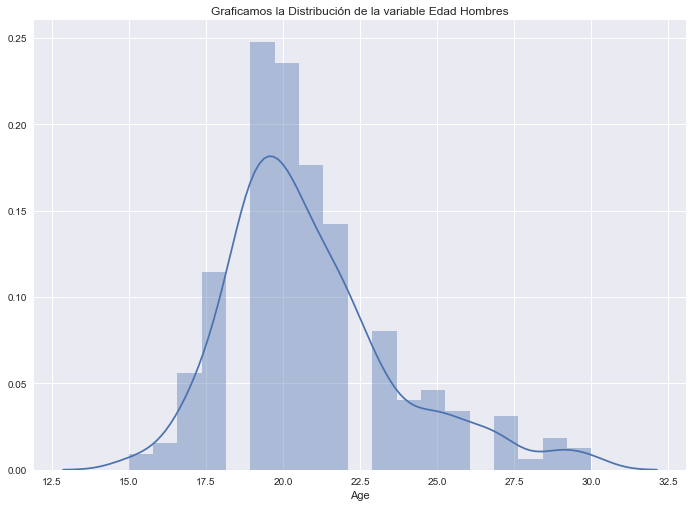

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = plt.axes()
ax.set_title('Graficamos la Distribución de la variable Edad Hombres')
sns.distplot(dataset_edad_hombres.Age);

C:\Users\maliaga\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


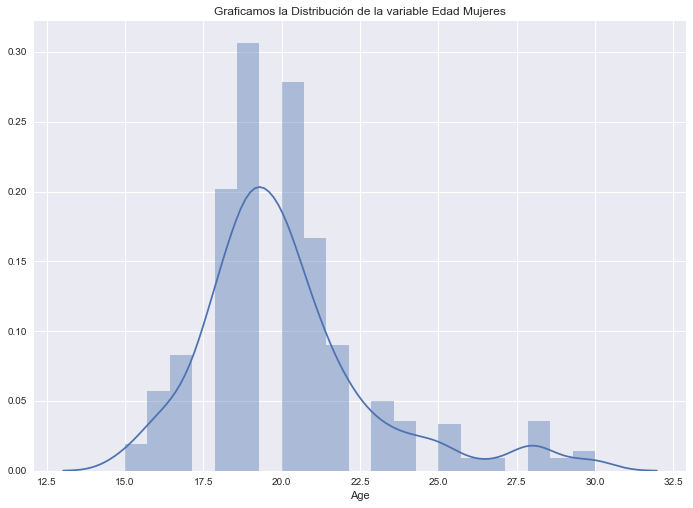

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = plt.axes()
ax.set_title('Graficamos la Distribución de la variable Edad Mujeres')
sns.distplot(dataset_edad_mujeres.Age);

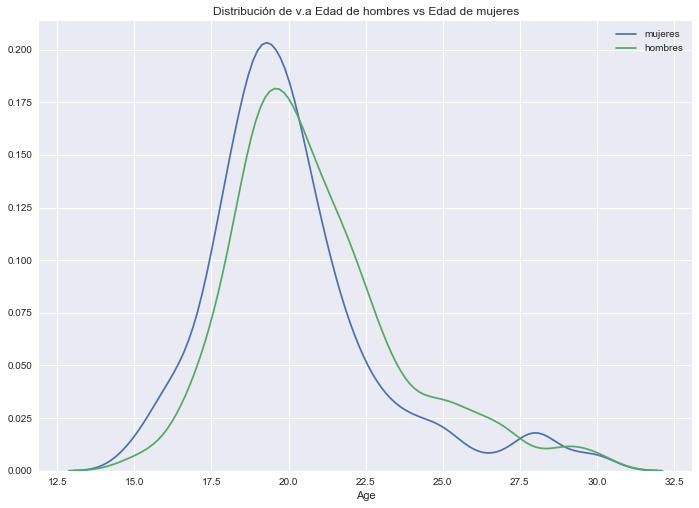

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = plt.axes()
ax.set_title('Distribución de v.a Edad de hombres vs Edad de mujeres')
sns.distplot(dataset_edad_mujeres.Age, hist=False, label="mujeres");
sns.distplot(dataset_edad_hombres.Age, hist=False, label="hombres");

**Las distribuciones de ambas v.a responden a una distribuciones normal.En la comparación de la distribución de edades por sexo vemos que las medias, dentro del rango de edad de los entrevistados son bastantes similares. Creemos que esto es positivo para las investigaciones conducidas a partir de esta encuesta, ya que los entrevistados habran cursado su infancia, ya sea en una zona rural o urbana, en una misma epoca compartiendo vivencias sociales y culturales.**

In [27]:

#Revisamos los tamaños de ambos datasets
print(len(dataset_edad_hombres.Weight))
print(len(dataset_peso_hombres.Age))



409
405


C:\Users\maliaga\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


La correlacion entre peso y edad del hombre es: 0.25351
La correlacion entre peso y edad del mujer es: 0.15648


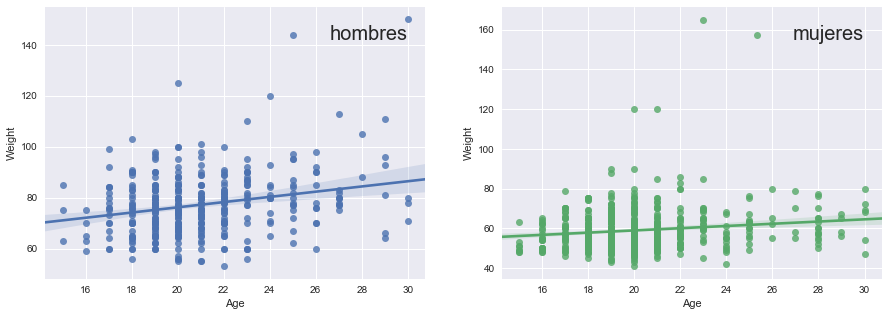

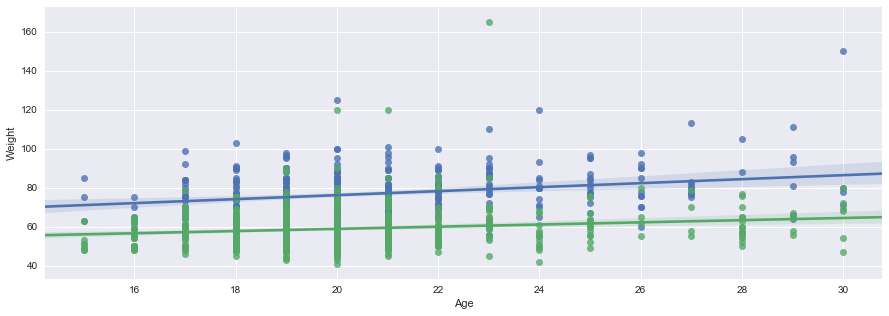

In [28]:
# Al ser distintos reemplazaremos los valores NaN con la media del resto de los valores (discriminados por sexo). 
# Para asi poder gráficar vect
filled_dataset = dataset
filled_dataset[filled_dataset.Gender =="male"].Age.fillna(edad_media_hombres, inplace=True)
filled_dataset[filled_dataset.Gender =="female"].Age.fillna(edad_media_mujeres, inplace=True)

#Calculo la correlacion entre las variables

hombres = filled_dataset[filled_dataset.Gender == "male"]
mujeres = filled_dataset[filled_dataset.Gender == "female"]

hombres_peso_edad_corr = hombres.corr().Age.Weight
mujeres_peso_edad_corr = mujeres.corr().Age.Weight

print("La correlacion entre peso y edad del hombre es: {:.5f}".format(hombres_peso_edad_corr))
print("La correlacion entre peso y edad del mujer es: {:.5f}".format(mujeres_peso_edad_corr))

# Separamos en edad y peso por sexo para graficar
edad_hombres = hombres.Age
peso_hombres = hombres.Weight

edad_mujeres = mujeres.Age
peso_mujeres = mujeres.Weight

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.regplot(edad_hombres, peso_hombres, ax=ax[0], label="hombres");
sns.regplot(edad_mujeres, peso_mujeres, ax=ax[1], label="mujeres");

ax[0].legend(loc=1, prop={"size":20});
ax[1].legend(loc=1, prop={"size":20});

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.regplot(edad_hombres, peso_hombres, label="hombres");
sns.regplot(edad_mujeres, peso_mujeres, label="mujeres");



* Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.
* Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.
* Responda a la siguientes preguntas: ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?

In [29]:
# v.a x = "consumo de alcohol"
# v.a y = "tabaquismo"


# Calculamos la probabilidad conjunta de x and y utilizando la funcion de pandas crosstab. Las probabilidades marginales
# se encuentran en la columna all

p_x_and_y = pd.crosstab(dataset.Alcohol, dataset.Smoking, normalize=True, dropna=True, margins=True)

p_x_and_y


Smoking,current smoker,former smoker,never smoked,tried smoking,All
Alcohol,,,,,
drink a lot,0.078,0.055,0.015,0.072,0.220
never,0.011,0.011,0.061,0.039,0.122
social drinker,0.099,0.109,0.131,0.319,0.658
All,0.188,0.175,0.207,0.430,1.000


In [24]:
# calculamos la correlacion entre tabaquismo y consumo de alcohol

# Desechamos los valores NaN

dataset_nan = dataset.dropna(subset=["Alcohol", "Smoking"])

dataset_alc_tab = dataset_nan.loc[:,["Alcohol", "Smoking"]]

# Al ser variables categoricas debemos codificarlas de algun modo para poder calcular la correlacion. Por la modalidad
# de la encuesta vemos que son variables categoricas ordinales por lo cual el orden es importante. 
alcohol_orden = ["Never", "Social drinker", "Drink a lot"]
smoking_orden = ["Never smoked", "Tried smoking", "Former smoker", "Current smoker"]

dataset_alc_tab_cat = dataset_alc_tab.astype(dtype={"Alcohol":"category", "Smoking":"category"}, ordered=True, 
                       categories={"Alcohol":alcohol_orden, "Smoking":smoking_orden})

dataset_alc_tab_cat.Smoking = dataset_alc_tab_cat.Smoking.cat.codes
dataset_alc_tab_cat.Alcohol = dataset_alc_tab_cat.Alcohol.cat.codes

dataset_alc_tab_cat.corr()


,Alcohol,Smoking
Alcohol,1.000000,0.212559
Smoking,0.212559,1.000000


**Vemos que si bien existe una relación lineal entre ambas variables, un aumento significativo en uno de ellas no implicaria un aumento en la misma proporción en la otra. Ej: No necesariamente porque mas personas empiece a consumir alochol la misma cantidad de gente tambien va a empezar a fumar.**

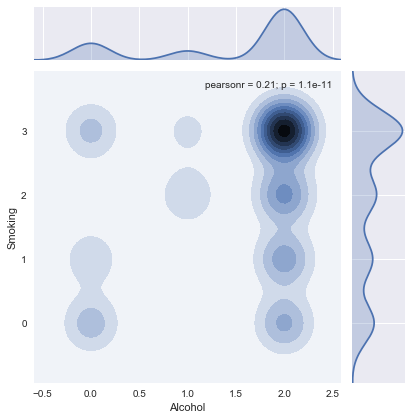

In [32]:
sns.jointplot("Alcohol", "Smoking", data=dataset_alc_tab_cat, kind="kde");


En el grafico de probabilidad conjunta se ve que hay una mayor densidad de probabilidad en la zona de bebedores sociales que ha su vez han probado fumar tabaco. 

¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? 

**Dado el valor de correlación entre ambas variables la medida causaría una leve disminución de tabaquismo en las personas que ya fuman o que prueban ocasionalmente, probablemente por razones sociales. Sin emgargo el nivel de tabaquismo debería verse reducido para los grupos de fumadores pasivos, reduciendo así el nivel de tabaquismo general.**

¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?**

**La probabilidad de que un fumador, obviando la gente que ha probado cigarrillos, que consumen alcohol es de aproximadamente un 30%. Con lo cual si este porcentaje de fumadores dejara de tomar alcohol, el consumo del mismo se veria notablemente disminuido.**